In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)


('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
print(recent_date)

TypeError: 'datetime.datetime' object is not subscriptable

In [13]:
# Calculate the date one year from the last date in data set.
last_date = recent_date - dt.timedelta(days=365)

In [14]:

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_date).all()

In [15]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [17]:
# Sort the dataframe by date
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


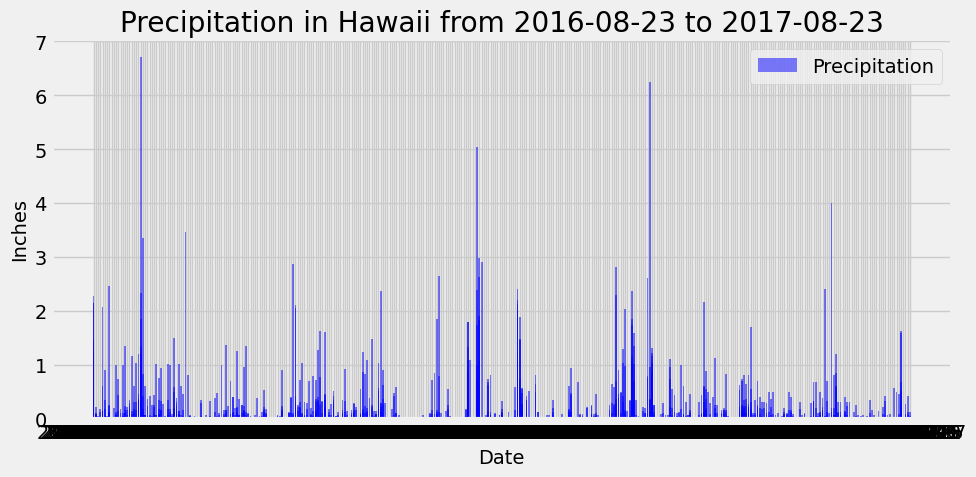

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = precipitation_df.index.values
y_axis = precipitation_df['Precipitation']

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center", label='Precipitation')

plt.title("Precipitation in Hawaii from 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(measurement.station).distinct().count()
print(f'There are {unique_stations} unique stations in the dataset')

There are 9 unique stations in the dataset


In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_measurements = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_measurements
for station, count in station_measurements:
    print(f'Station {station} had {count} measurements')



Station USC00519281 had 2772 measurements
Station USC00519397 had 2724 measurements
Station USC00513117 had 2709 measurements
Station USC00519523 had 2669 measurements
Station USC00516128 had 2612 measurements
Station USC00514830 had 2202 measurements
Station USC00511918 had 1979 measurements
Station USC00517948 had 1372 measurements
Station USC00518838 had 511 measurements


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_measurements[0][0]
most_active_station
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()



[(54.0, 85.0, 71.66378066378067)]

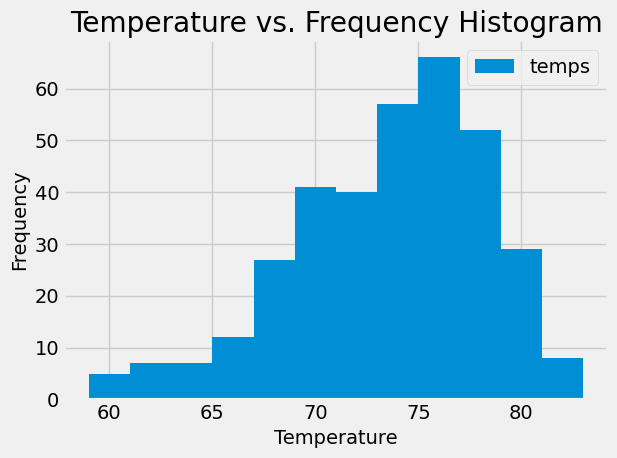

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= last_date).all()
most_active_station_df = pd.DataFrame(most_active_station, columns=['temps'])
most_active_station_df.head()

most_active_station_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()